In [1]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import pandas as pd
import random, re

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
labels_path = 'test_files/s_exp_test.csv'
features_path = 'test_files/s_exp_features_test.csv'

In [4]:
s_exp_features = pd.read_csv(features_path, index_col = 0)
s_exp_features.columns = ["Number of Notes", "Location of First Note", "Total Duration of Rests", "Average Max Slope", "Order of Contour", "Consonance"]
s_exp_features.head()

,Number of Notes,Location of First Note,Total Duration of Rests,Average Max Slope,Order of Contour,Consonance
0,2.0,0.125000,0.584635,4.0,0.0,0.0415
1,1.0,0.678385,-0.678385,0.0,0.0,0.4068
2,5.0,0.036458,-11.315104,1.5,1.0,1.5536
3,1.0,0.003906,-2.003906,0.0,0.0,0.0004
4,7.0,0.170573,-31.157552,4.0,2.0,1.5620


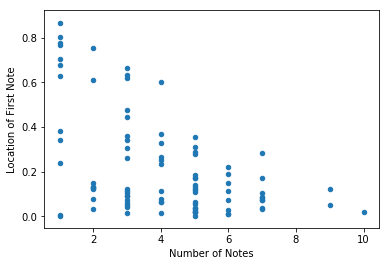

In [5]:
s_exp_features.plot.scatter("Number of Notes", "Location of First Note")

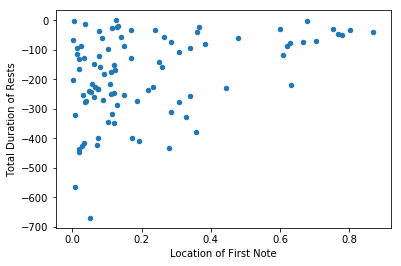

In [6]:
s_exp_features.plot.scatter("Location of First Note", "Total Duration of Rests")

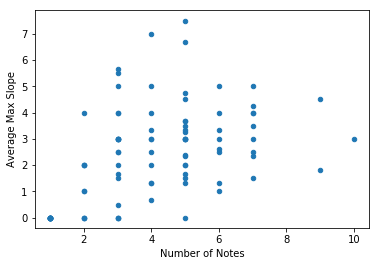

In [7]:
s_exp_features.plot.scatter("Number of Notes", "Average Max Slope")

# Night and Day

In [8]:
_input_path = "midi_to_csv/WebsterNight_chords.csv"
_output_path = "generated_solos/12_bar_simple.csv"

In [17]:
a = "C#4"
a[:-1]

'C#'

In [29]:
_input = pd.read_csv(_input_path).drop("chord",1).drop("velocity",1)
_input["pitch_class"] = [a[:-1] for a in _input["note_name"]]
_input.head()

,Unnamed: 0,note_name,start_time,duration,pitch_class
0,0,F4,0.125000,0.154948,F
1,1,A4,0.290365,0.725260,A
2,2,B4,1.678385,0.339844,B
3,3,C#5,2.036458,0.174479,C#
4,4,B4,2.255208,0.164062,B


In [30]:
_output = pd.read_csv(_output_path)
_output["pitch_class"] = [a[:-1] for a in _output["note_name"]]
_output.head()

,Unnamed: 0,note_name,start_time,duration,pitch_class
0,0,Bb4,0.120,0.067,Bb
1,1,Db5,0.197,0.048,Db
2,2,Bb4,0.255,0.051,Bb
3,3,F4,0.341,0.124,F
4,4,B3,0.543,0.203,B


## Pitch Distribution

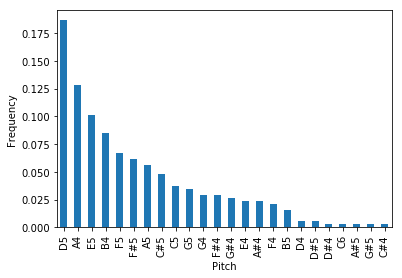

In [31]:
_input_note_name_prop = _input["note_name"].value_counts()/sum(_input["note_name"].value_counts())
x1 = _input_note_name_prop.plot.bar()
x1.set_xlabel("Pitch")
x1.set_ylabel("Frequency")

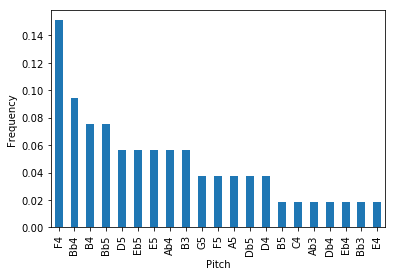

In [32]:
_output_note_name_prop = _output["note_name"].value_counts()/sum(_output["note_name"].value_counts())
x2 = _output_note_name_prop.plot.bar()
x2.set_xlabel("Pitch")
x2.set_ylabel("Frequency")

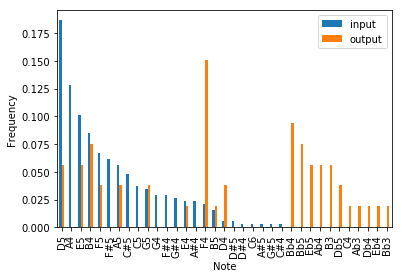

In [33]:
_input_prop_df = pd.DataFrame(_input_note_name_prop).reset_index()
_output_prop_df = pd.DataFrame(_output_note_name_prop).reset_index()
joined_note_name = _input_prop_df.merge(_output_prop_df, on = "index", how = "outer").fillna(0)
joined_note_name.columns = ["note_name", "input","output"]
x1x2 = joined_note_name.plot.bar(x = "note_name")
x1x2.set_xlabel("Note")
x1x2.set_ylabel("Frequency")

## Pitch Class Distribution

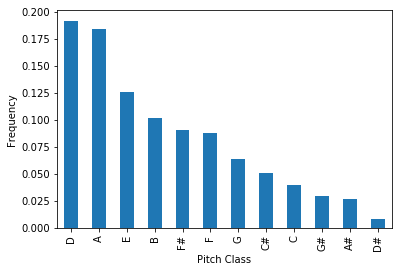

In [35]:
_input_pitch_class_prop = _input["pitch_class"].value_counts()/sum(_input["pitch_class"].value_counts())
x1 = _input_pitch_class_prop.plot.bar()
x1.set_xlabel("Pitch Class")
x1.set_ylabel("Frequency")

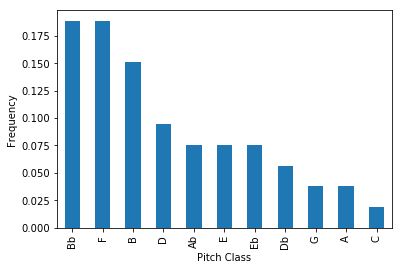

In [37]:
_output_pitch_class_prop = _output["pitch_class"].value_counts()/sum(_output["pitch_class"].value_counts())
x2 = _output_pitch_class_prop.plot.bar()
x2.set_xlabel("Pitch Class")
x2.set_ylabel("Frequency")

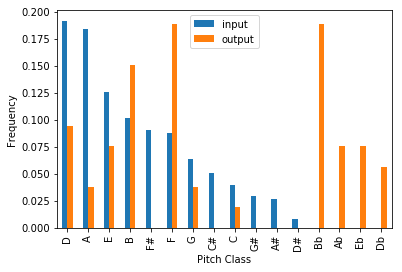

In [38]:
_input_prop_df = pd.DataFrame(_input_pitch_class_prop).reset_index()
_output_prop_df = pd.DataFrame(_output_pitch_class_prop).reset_index()
joined_note_name = _input_prop_df.merge(_output_prop_df, on = "index", how = "outer").fillna(0)
joined_note_name.columns = ["pitch_class", "input","output"]
x1x2 = joined_note_name.plot.bar(x = "pitch_class")
x1x2.set_xlabel("Pitch Class")
x1x2.set_ylabel("Frequency")

## Duration Distribution

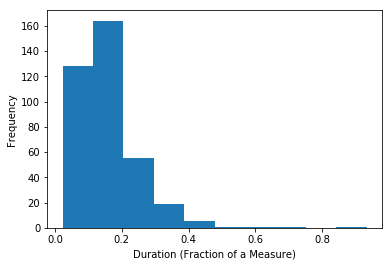

In [50]:
x1 = _input["duration"].plot.hist()
x1.set_xlabel("Duration (Fraction of a Measure)")

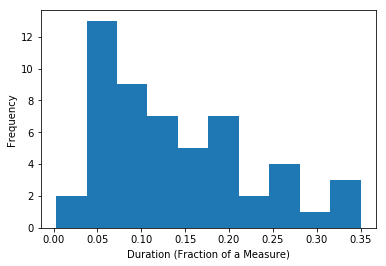

In [52]:
x2 = _output["duration"].plot.hist()
x2.set_xlabel("Duration (Fraction of a Measure)")

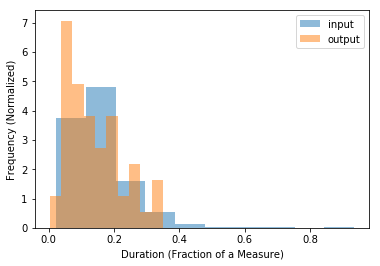

In [55]:
x1 = _input["duration"]
x2 = _output["duration"]

plt.hist(x1, normed = True, alpha = 0.5, label = 'input') #, bins, alpha=0.5, label='x')
plt.hist(x2, normed = True, alpha = 0.5, label = 'output') #, bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.xlabel("Duration (Fraction of a Measure)")
plt.ylabel("Frequency (Normalized)")
plt.show()